In [209]:
%matplotlib inline
import d2lzh as d2l
from mxnet import gluon, init
from mxnet.gluon import loss as gloss, nn

(1, 28, 28)


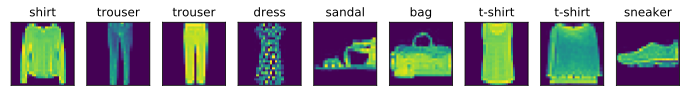

In [210]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

for X, y in train_iter:
    print(X[0].shape)
    d2l.show_fashion_mnist(X[0:9], d2l.get_fashion_mnist_labels(y.asnumpy()))
    break

In [211]:
net = nn.Sequential()
net.add(nn.Dense(10))
net.initialize(init.Normal(sigma=0.01))

In [212]:
loss = gloss.SoftmaxCrossEntropyLoss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.02})


In [ ]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, trainer)


In [ ]:
for k, v in net.collect_params().items():
    print(f'key: {k}')
    print(v.data())

In [ ]:
import numpy as np
#run the net, output result
def run_net(X: list, net):
    return net(X).argmax(1)

def count_err(yhat, y):
    #count the number of the incorrect labels
    #params:
    # yhat: indices list of the labels
    return np.count_nonzero((yhat == y) == False)

print('Error rate summary: ')
num_errs, num_total = 0, 0
for X, y in test_iter:
    yhat = run_net(X, net)
#     print(f'y: {y}, \nyhat: {yhat}')
    curr_errs = count_err(run_net(X, net).asnumpy(), y.asnumpy())
    num_imgs = len(X)
    num_errs += curr_errs
    num_total += num_imgs
    print(f'curr_err: {curr_errs}, num_img: {num_imgs} err_rate: {curr_errs / float(num_imgs)}')
print(f'total error rate: {num_errs / num_total}')
    